Though Process-
1. import libraries
2. import data
3. check for null values and deal witht them- either remove or replace
4. Encode categorical data
5. Normalize/scale data
6. split data into train, test
7. for categorical variables, change them to numerical
8. as "Risk" column isnt present, we need to do UNSUPERVISED LEARNING ALGORITHMS-
    i) KMeans
   ii) PCA  (dimensionality reduction)

https://www.kdnuggets.com/2023/04/exploring-unsupervised-learning-metrics.html
https://medium.com/aiskunks/categorical-data-encoding-techniques-d6296697a40f


# Importing Libraries

In [40]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [44]:
from sklearn.preprocessing import StandardScaler

In [47]:
from sklearn.cluster import KMeans

In [81]:
import streamlit as st

# Importing data

In [144]:
data = pd.read_csv("C:/Users/Diya/Downloads/german_credit_data.csv")

In [145]:
data.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


In [146]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
dtypes: int64(5), object(5)
memory usage: 78.2+ KB


# Check for null values and deal with them

In [147]:
data.isnull().sum()

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64

In [148]:
columns = data.columns

In [149]:
columns

Index(['Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose'],
      dtype='object')

In [150]:
data.drop('Unnamed: 0', axis=1, inplace=True)

In [151]:
data.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,NaN,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car


In [155]:
data.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


In [156]:
missing_cols = ['Saving accounts', 'Checking account']
for col in missing_cols:
    if col in data.columns:
        # --- Recommended change: Assign the result back ---
        data[col] = data[col].fillna('Unknown')

In [157]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   1000 non-null   object
 5   Checking account  1000 non-null   object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
dtypes: int64(4), object(5)
memory usage: 70.4+ KB


In [158]:
data.isnull().sum()

Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
dtype: int64

In [159]:
df = data.copy()

In [162]:
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
print(categorical_cols)


['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']


In [163]:
categorical_cols

['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']

In [164]:
data.nunique().sort_values()

Sex                   2
Housing               3
Job                   4
Checking account      4
Saving accounts       5
Purpose               8
Duration             33
Age                  53
Credit amount       921
dtype: int64

# Encoding

In [165]:
data['Sex'].unique()

array(['male', 'female'], dtype=object)

In [166]:
data['Housing'].unique()

array(['own', 'free', 'rent'], dtype=object)

In [167]:
data['Saving accounts'].unique()

array(['Unknown', 'little', 'quite rich', 'rich', 'moderate'],
      dtype=object)

In [168]:
data['Checking account'].unique()

array(['little', 'moderate', 'Unknown', 'rich'], dtype=object)

In [169]:
data['Purpose'].unique()

array(['radio/TV', 'education', 'furniture/equipment', 'car', 'business',
       'domestic appliances', 'repairs', 'vacation/others'], dtype=object)

In [170]:
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})

In [171]:
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

In [172]:
data.head()

,Age,Job,Credit amount,Duration,Sex_1,Housing_own,Housing_rent,Saving accounts_little,Saving accounts_moderate,Saving accounts_quite rich,...,Checking account_little,Checking account_moderate,Checking account_rich,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,67,2,1169,6,False,True,False,False,False,False,...,True,False,False,False,False,False,False,True,False,False
1,22,2,5951,48,True,True,False,True,False,False,...,False,True,False,False,False,False,False,True,False,False
2,49,1,2096,12,False,True,False,True,False,False,...,False,False,False,False,False,True,False,False,False,False
3,45,2,7882,42,False,False,False,True,False,False,...,True,False,False,False,False,False,True,False,False,False
4,53,2,4870,24,False,False,False,True,False,False,...,True,False,False,True,False,False,False,False,False,False


In [173]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Age                          1000 non-null   int64
 1   Job                          1000 non-null   int64
 2   Credit amount                1000 non-null   int64
 3   Duration                     1000 non-null   int64
 4   Sex_1                        1000 non-null   bool 
 5   Housing_own                  1000 non-null   bool 
 6   Housing_rent                 1000 non-null   bool 
 7   Saving accounts_little       1000 non-null   bool 
 8   Saving accounts_moderate     1000 non-null   bool 
 9   Saving accounts_quite rich   1000 non-null   bool 
 10  Saving accounts_rich         1000 non-null   bool 
 11  Checking account_little      1000 non-null   bool 
 12  Checking account_moderate    1000 non-null   bool 
 13  Checking account_rich        1000 non-null   bool

In [174]:
data.columns

Index(['Age', 'Job', 'Credit amount', 'Duration', 'Sex_1', 'Housing_own',
       'Housing_rent', 'Saving accounts_little', 'Saving accounts_moderate',
       'Saving accounts_quite rich', 'Saving accounts_rich',
       'Checking account_little', 'Checking account_moderate',
       'Checking account_rich', 'Purpose_car', 'Purpose_domestic appliances',
       'Purpose_education', 'Purpose_furniture/equipment', 'Purpose_radio/TV',
       'Purpose_repairs', 'Purpose_vacation/others'],
      dtype='object')

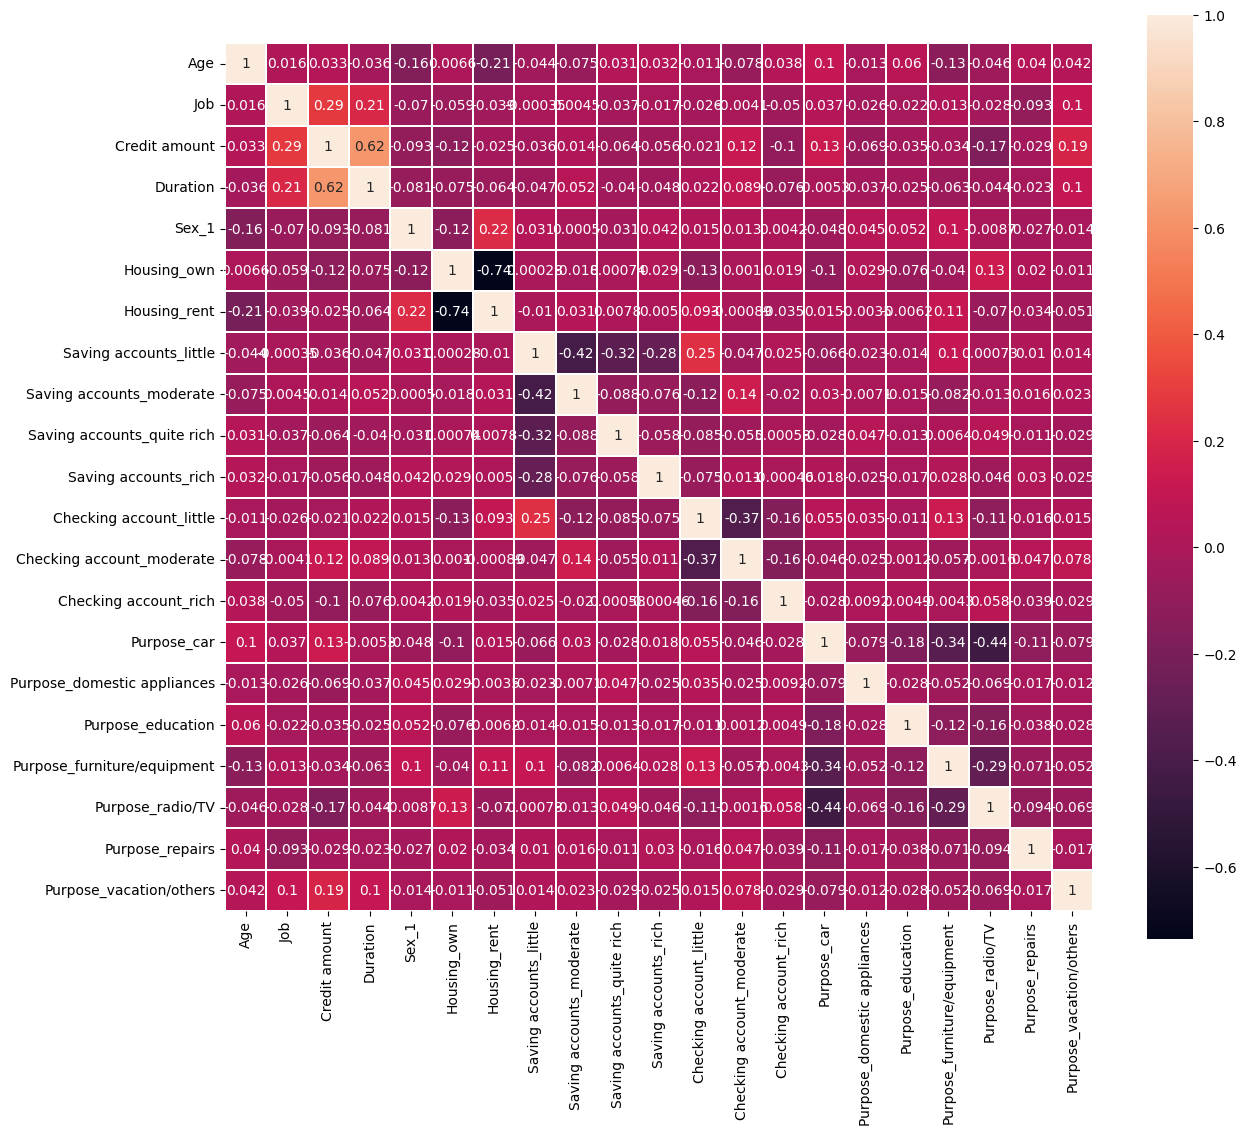

In [175]:
plt.figure(figsize=(14,12))
sns.heatmap(data.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True,  linecolor='white', annot=True)
plt.show()

# Standardization 

In [176]:
numerical_cols = ['Age', 'Credit amount', 'Duration', 'Job']

In [177]:
scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

In [178]:
data

,Age,Job,Credit amount,Duration,Sex_1,Housing_own,Housing_rent,Saving accounts_little,Saving accounts_moderate,Saving accounts_quite rich,...,Checking account_little,Checking account_moderate,Checking account_rich,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,2.766456,0.146949,-0.745131,-1.236478,False,True,False,False,False,False,...,True,False,False,False,False,False,False,True,False,False
1,-1.191404,0.146949,0.949817,2.248194,True,True,False,True,False,False,...,False,True,False,False,False,False,False,True,False,False
2,1.183312,-1.383771,-0.416562,-0.738668,False,True,False,True,False,False,...,False,False,False,False,False,True,False,False,False,False
3,0.831502,0.146949,1.634247,1.750384,False,False,False,True,False,False,...,True,False,False,False,False,False,True,False,False,False
4,1.535122,0.146949,0.566664,0.256953,False,False,False,True,False,False,...,True,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.399832,-1.383771,-0.544162,-0.738668,True,True,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
996,0.391740,1.677670,0.207612,0.754763,False,True,False,True,False,False,...,True,False,False,True,False,False,False,False,False,False
997,0.215835,0.146949,-0.874503,-0.738668,False,True,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
998,-1.103451,0.146949,-0.505528,1.999289,False,False,False,True,False,False,...,True,False,False,False,False,False,False,True,False,False


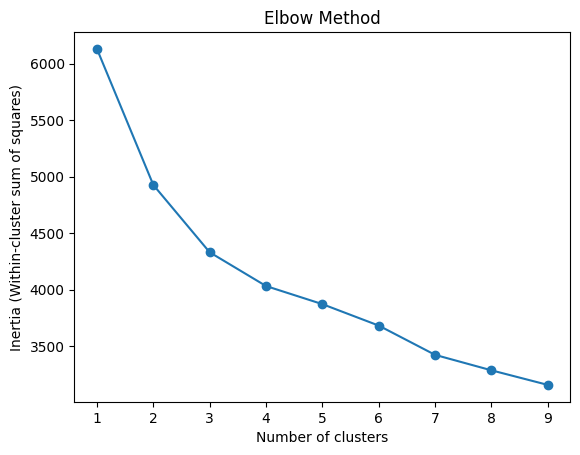

In [179]:
inertia = []
k_range = range(1, 10)

for k in k_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(data)
    inertia.append(km.inertia_)

plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia (Within-cluster sum of squares)')
plt.title('Elbow Method')
plt.show()

In [180]:
k=3

In [181]:
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(data)

# Assign cluster labels
data['Cluster'] = kmeans.labels_

In [182]:
df['Cluster'] = kmeans.labels_

In [183]:
# Count how many samples are in each cluster
print(data['Cluster'].value_counts())

Cluster
1    565
2    244
0    191
Name: count, dtype: int64


In [184]:
data.head()

,Age,Job,Credit amount,Duration,Sex_1,Housing_own,Housing_rent,Saving accounts_little,Saving accounts_moderate,Saving accounts_quite rich,...,Checking account_moderate,Checking account_rich,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,Cluster
0,2.766456,0.146949,-0.745131,-1.236478,False,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,2
1,-1.191404,0.146949,0.949817,2.248194,True,True,False,True,False,False,...,True,False,False,False,False,False,True,False,False,0
2,1.183312,-1.383771,-0.416562,-0.738668,False,True,False,True,False,False,...,False,False,False,False,True,False,False,False,False,2
3,0.831502,0.146949,1.634247,1.750384,False,False,False,True,False,False,...,False,False,False,False,False,True,False,False,False,0
4,1.535122,0.146949,0.566664,0.256953,False,False,False,True,False,False,...,False,False,True,False,False,False,False,False,False,2


In [185]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Cluster
0,67,male,2,own,Unknown,little,1169,6,radio/TV,2
1,22,female,2,own,little,moderate,5951,48,radio/TV,0
2,49,male,1,own,little,Unknown,2096,12,education,2
3,45,male,2,free,little,little,7882,42,furniture/equipment,0
4,53,male,2,free,little,little,4870,24,car,2


C:\Users\Diya\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Diya\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Diya\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Diya\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 t

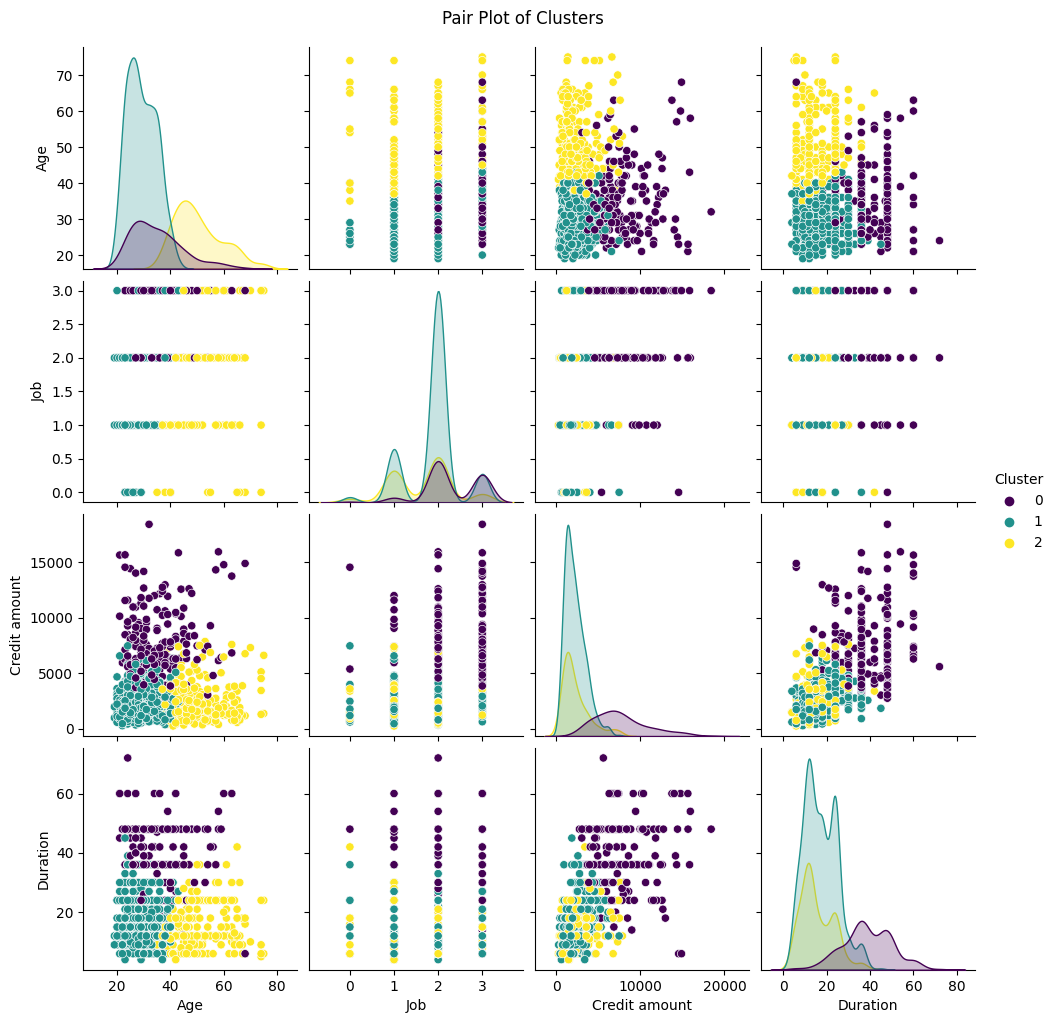

In [186]:
sns.pairplot(df, hue='Cluster', palette='viridis')
plt.suptitle('Pair Plot of Clusters', y=1.02)
plt.show()

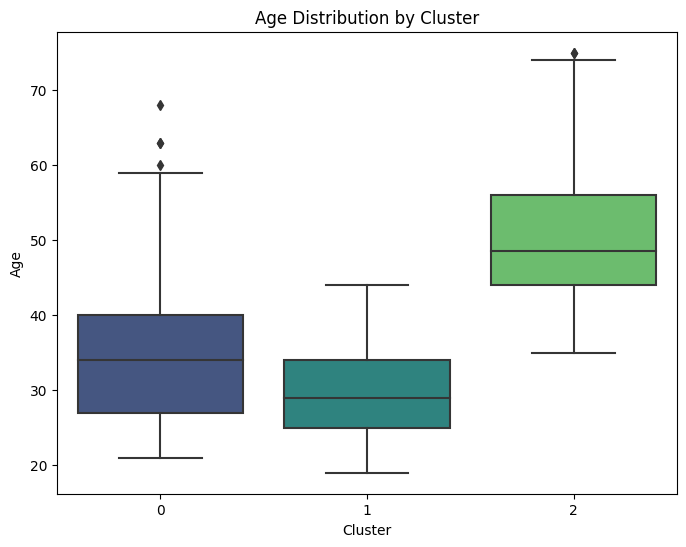

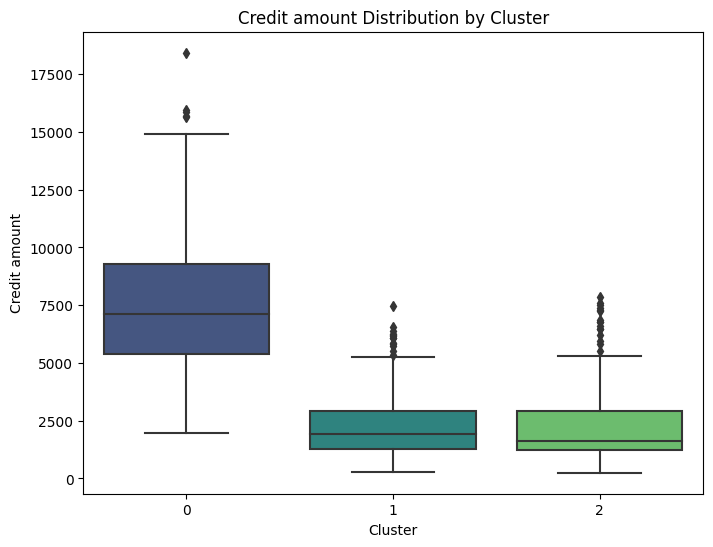

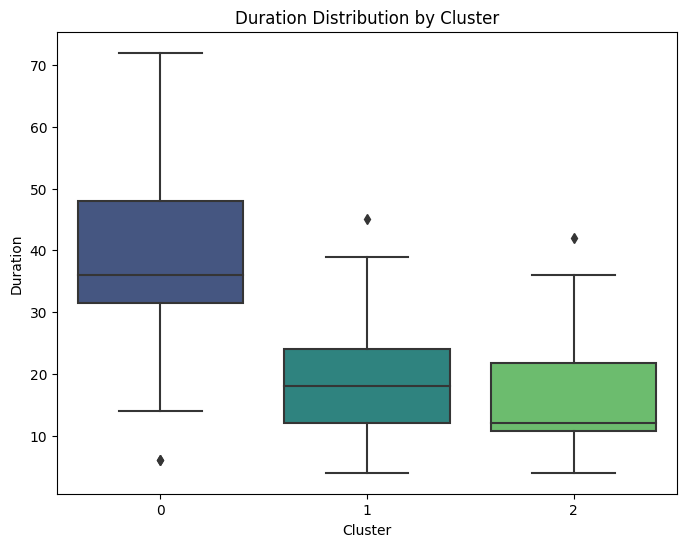

In [187]:
for feature in ['Age','Credit amount', 'Duration']:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Cluster', y=feature, data=df, palette='viridis')
    plt.title(f'{feature} Distribution by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(feature)
    plt.show()

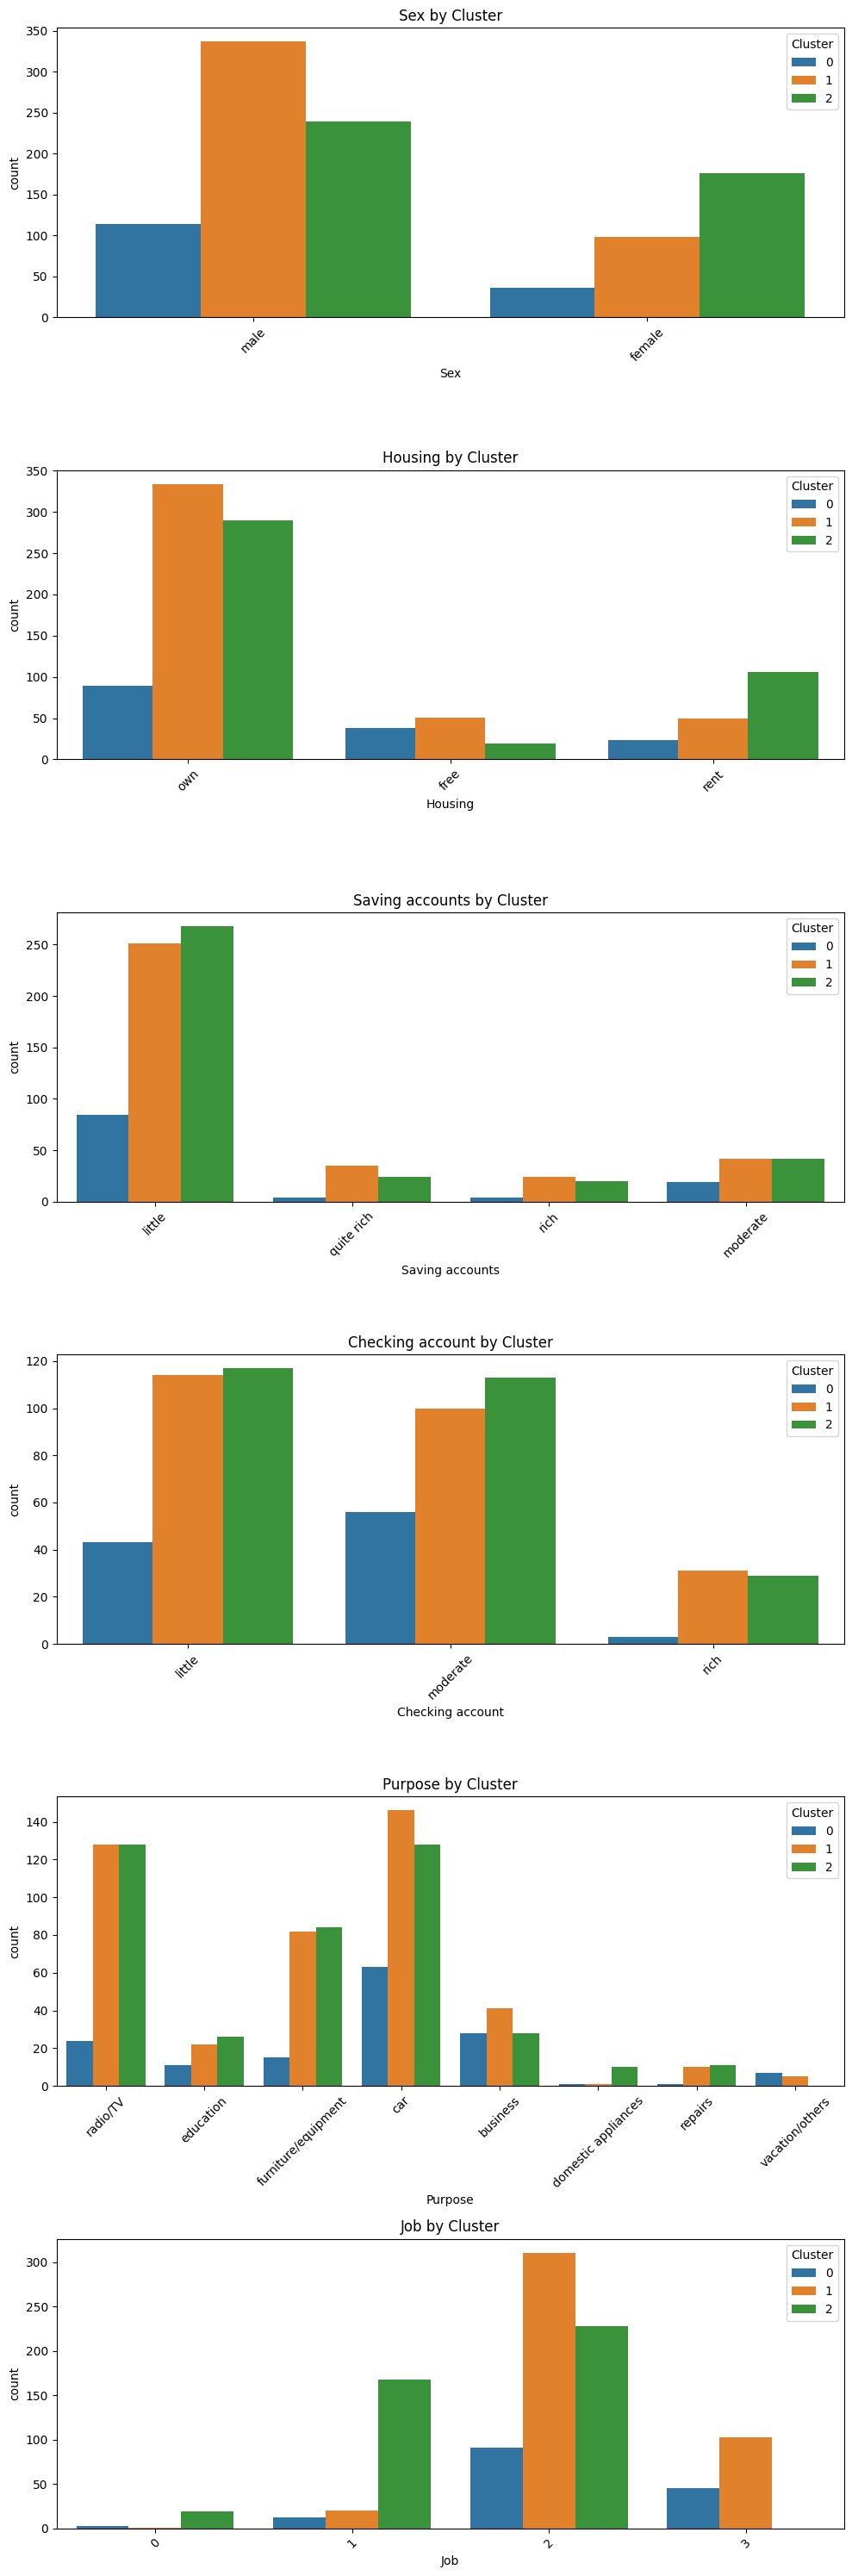

In [74]:
categorical_analysis_cols = ['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose', 'Job']
plt.figure(figsize=(10, 5 * len(categorical_analysis_cols)))

for i, col in enumerate(categorical_analysis_cols):
    plt.subplot(len(categorical_analysis_cols), 1, i + 1)
    sns.countplot(data=df, x=col, hue='Cluster')
    plt.title(f'{col} by Cluster')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [188]:
df.to_csv("clustered.csv", index=False)

In [189]:
pd.read_csv('clustered.csv')

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Cluster
0,67,male,2,own,Unknown,little,1169,6,radio/TV,2
1,22,female,2,own,little,moderate,5951,48,radio/TV,0
2,49,male,1,own,little,Unknown,2096,12,education,2
3,45,male,2,free,little,little,7882,42,furniture/equipment,0
4,53,male,2,free,little,little,4870,24,car,2
...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,Unknown,1736,12,furniture/equipment,1
996,40,male,3,own,little,little,3857,30,car,0
997,38,male,2,own,little,Unknown,804,12,radio/TV,1
998,23,male,2,free,little,little,1845,45,radio/TV,1
